In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing


In [23]:
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg' , 'thalach' , 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

In [24]:
df = pd.read_csv('./heart+disease/processed.cleveland.data', header=None, names=column_names)
df.head(30)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [25]:
df.shape

(303, 14)

In [26]:
# how to relace all '?' in df to nan
df = df.replace('?', np.nan)
# check if there is any nan
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    object 
 12  thal      301 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [28]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


Czy zbiór jest zbalansowany pod względem liczby próbek na klasy?


In [29]:
#is data balanced in terms of count of each class?
df['num'].value_counts()

num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

<Axes: xlabel='num'>

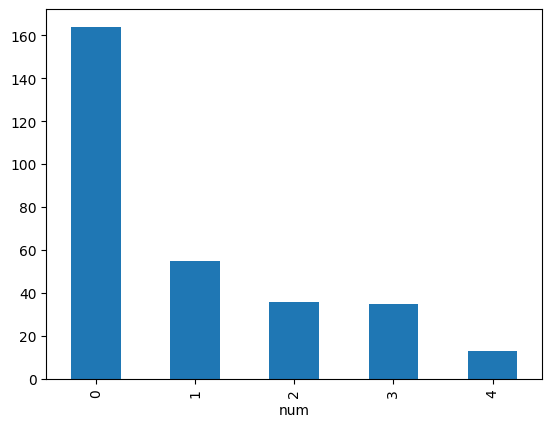

In [30]:
df['num'].value_counts().plot.bar()

abscene:  164
some_hearth_disease:  139


<BarContainer object of 2 artists>

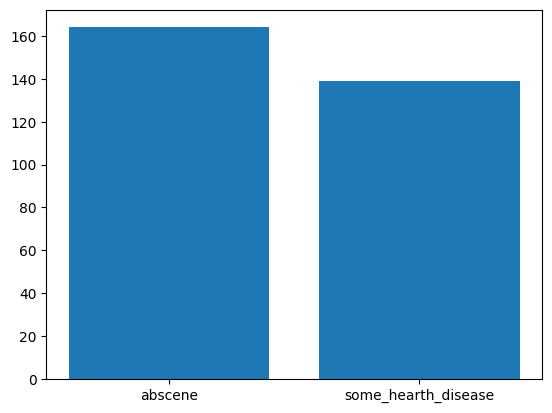

In [31]:

# count values with 0 and any other value
abscene = df['num'].value_counts()[0]
some_hearth_disease = df['num'].value_counts()[1:].sum()
print('abscene: ', abscene)
print('some_hearth_disease: ', some_hearth_disease)
# plot it
plt.bar(['abscene', 'some_hearth_disease'], [abscene, some_hearth_disease])



Jakie są średnie i odchylenia cech liczbowych?


In [39]:
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
#describe numeric features
df[numeric_features].describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604
std,9.038662,17.599748,51.776918,22.875003,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000
75%,61.000000,140.000000,275.000000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


Dla cech liczbowych: czy ich rozkład jest w przybliżeniu normalny?

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'oldpeak'}>, <Axes: >]], dtype=object)

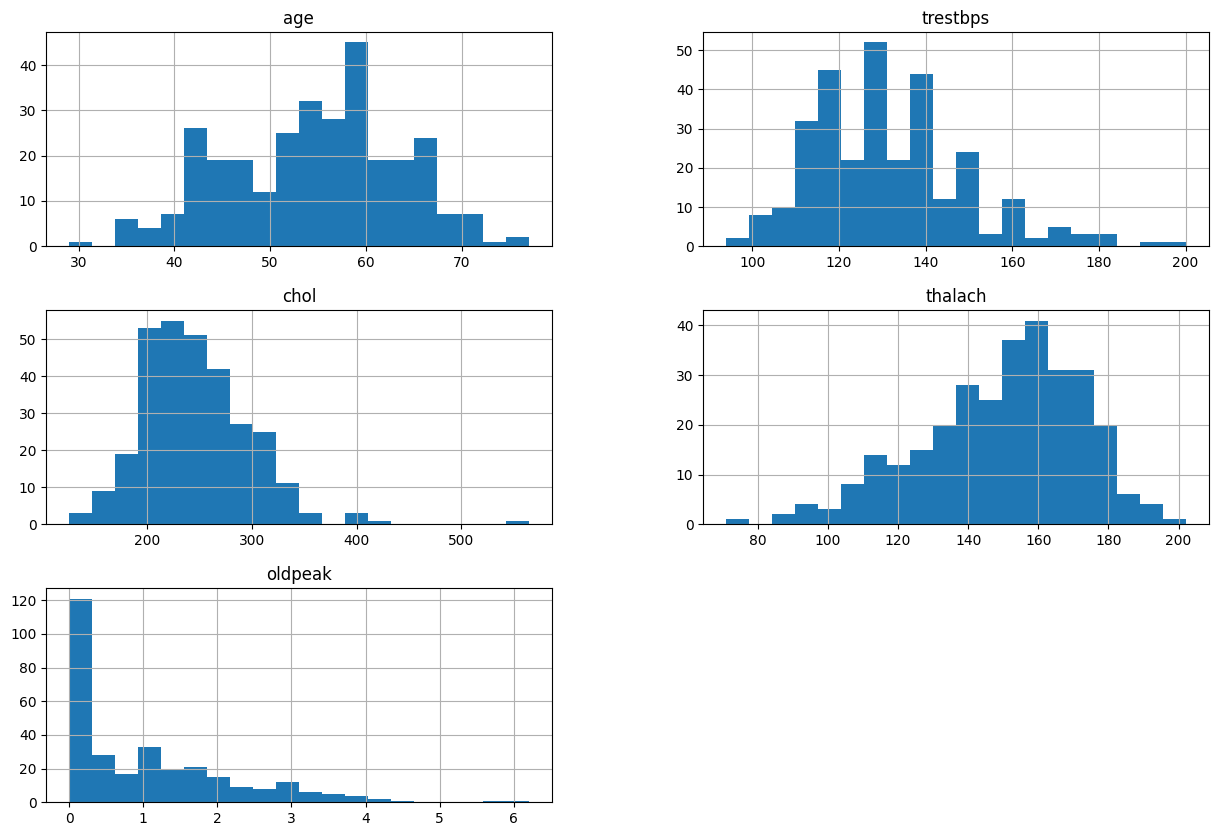

In [38]:
# is numeric features normal distribution?
df[numeric_features].hist(bins=20, figsize=(15, 10))

Dla cech kategorycznych: czy rozkład jest w przybliżeniu równomierny?

array([[<Axes: title={'center': 'sex'}>, <Axes: title={'center': 'cp'}>],
       [<Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>],
       [<Axes: title={'center': 'exang'}>, <Axes: >]], dtype=object)

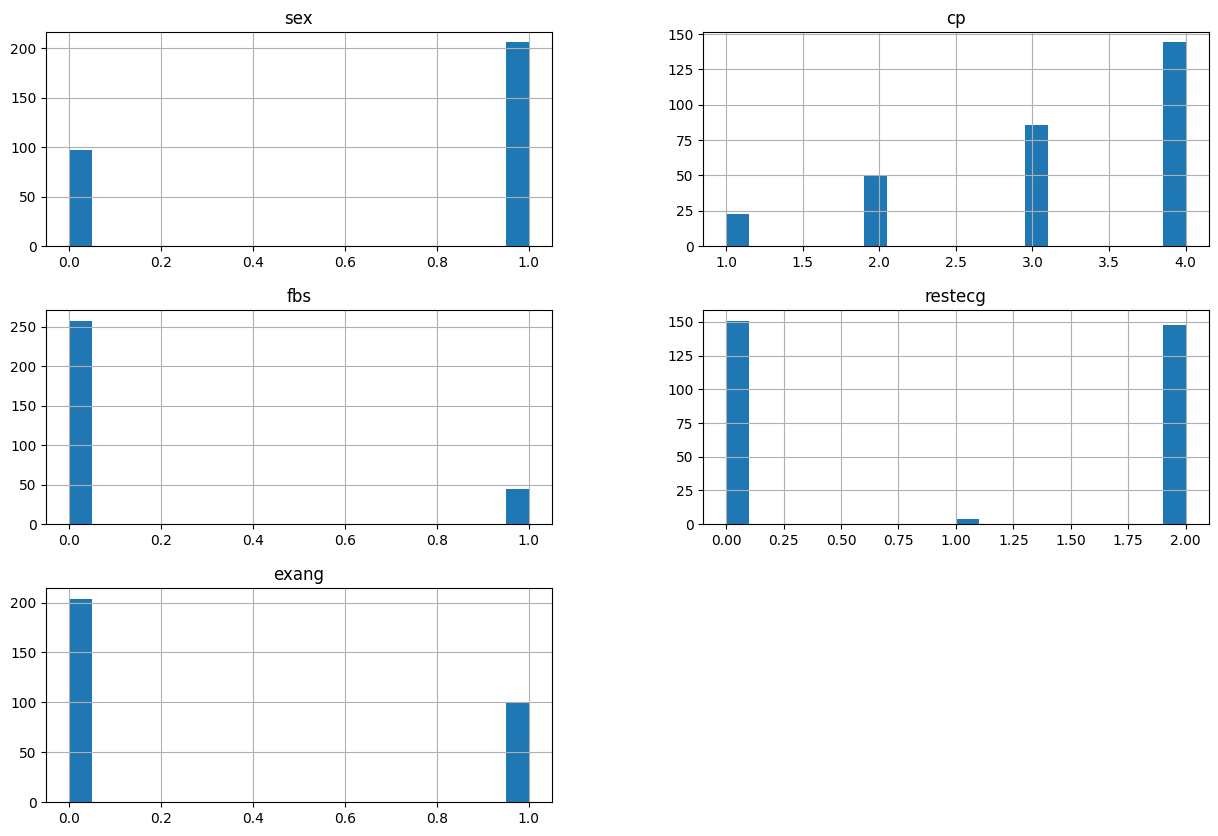

In [12]:
categories_features = ['sex', 'cp', 'fbs', 'restecg', 'exang']
# describe categories features
df[categories_features].describe()
#plot categories features
# TODO do poprawy
df[categories_features].hist(bins=20, figsize=(15, 10))

In [37]:
# plot categories features
df.head(100)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,52.0,1.0,4.0,128.0,255.0,0.0,0.0,161.0,1.0,0.0,1.0,1.0,7.0,1
96,59.0,1.0,4.0,110.0,239.0,0.0,2.0,142.0,1.0,1.2,2.0,1.0,7.0,2
97,60.0,0.0,4.0,150.0,258.0,0.0,2.0,157.0,0.0,2.6,2.0,2.0,7.0,3
98,52.0,1.0,2.0,134.0,201.0,0.0,0.0,158.0,0.0,0.8,1.0,1.0,3.0,0


Czy występują cechy brakujące i jaką strategię możemy zastosować żeby je
zastąpić?

Usunięcie rekordów: Jeśli braki danych są sporadyczne i nie stanowią znaczącej części zbioru danych, można rozważyć usunięcie rekordów zawierających brakujące dane. Jednak jest to zwykle ostateczność i może prowadzić do utraty cennych informacji.

Uzupełnianie brakujących danych średnią/medianą: Możesz uzupełnić brakujące dane cech wartościami średnimi lub medianą z danej kolumny. Jest to przydatne, gdy dane są rozkładem normalnym lub nie zawierają wartości odstających.

Uzupełnianie brakujących danych za pomocą interpolacji: W przypadku danych szeregów czasowych lub przestrzennych, można użyć interpolacji, aby oszacować brakujące dane na podstawie dostępnych danych z pobliskich punktów czasowych lub przestrzennych.

Uzupełnianie brakujących danych za pomocą algorytmów uczenia maszynowego: Możesz również użyć modeli uczenia maszynowego, takich jak algorytmy regresji, drzewa decyzyjne, czy algorytmy bazujące na głębokim uczeniu do przewidywania brakujących danych na podstawie dostępnych danych i innych cech.

Uzupełnianie danych za pomocą technik imputacji: Istnieją zaawansowane techniki imputacji, takie jak imputacja MICE (Multiple Imputation by Chained Equations), K-nearest neighbors (K-NN imputation), czy imputacja za pomocą modeli generatywnych, które mogą być skuteczne w uzupełnianiu brakujących danych.

Używanie danych kategorycznych: Jeśli dane są kategoryczne, można przypisać brakujące wartości do kategorii "brak danych" lub użyć technik kodowania kategorycznego.

Dodawanie nowych cech: W niektórych przypadkach warto rozważyć dodanie nowych cech do zbioru danych, które mogą pomóc w modelowaniu brakujących danych.

Badanie przyczyn braków danych: Ważne jest również zrozumienie przyczyn braków danych i, jeśli to możliwe, podjęcie działań mających na celu ich minimalizację w przyszłości.


In [36]:


df.head(100) 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,52.0,1.0,4.0,128.0,255.0,0.0,0.0,161.0,1.0,0.0,1.0,1.0,7.0,1
96,59.0,1.0,4.0,110.0,239.0,0.0,2.0,142.0,1.0,1.2,2.0,1.0,7.0,2
97,60.0,0.0,4.0,150.0,258.0,0.0,2.0,157.0,0.0,2.6,2.0,2.0,7.0,3
98,52.0,1.0,2.0,134.0,201.0,0.0,0.0,158.0,0.0,0.8,1.0,1.0,3.0,0


In [35]:
# select only numeric features
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
# describe numeric features
#create a matrix of numeric features (examples × features).
numeric_matrix = df[numeric_features].values
numeric_matrix

array([[63.0, 145.0, 233.0, 150.0, 2.3, '0.0'],
       [67.0, 160.0, 286.0, 108.0, 1.5, '3.0'],
       [67.0, 120.0, 229.0, 129.0, 2.6, '2.0'],
       ...,
       [57.0, 130.0, 131.0, 115.0, 1.2, '1.0'],
       [57.0, 130.0, 236.0, 174.0, 0.0, '1.0'],
       [38.0, 138.0, 175.0, 173.0, 0.0, nan]], dtype=object)

In [40]:
y = df["num"]
X = df.drop('num',axis=1)


In [41]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0


In [43]:
y

0      0
1      2
2      1
3      0
4      0
      ..
298    1
299    2
300    3
301    1
302    0
Name: num, Length: 303, dtype: int64